# Part II - Effect of User Type and Days of Week on Bike Trips
## by Adewale Olayemi

## Investigation Overview
In this investigation, the main focus is on the user type and days of the week features. I will be looking at how these two variable affect the number of bike trips and the time spent on riding bike.

## Dataset Overview
The dataset used for this project consist of 519700 bike trips made between June 2017 to December 2017. The dataset was provided by Ford GoBike, a bike sharing system covering the greater San Francisco Bay area. Some of the variables in the dataset includes trip duration, user type, start and end station, user gender, etc. I performed data wrangling on the dataset like assessing the data, changing data type, removing missing values, etc.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [5]:
# Data wrangling
df_clean = df.copy()
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

df_clean['duration_minutes'] = df_clean['duration_sec']/60
df_clean['month'] = df_clean['start_time'].dt.month_name()
df_clean['day'] = df_clean['start_time'].dt.day_name()
df_clean.dropna(inplace = True)
df_clean['user_age'] = 2017 - df_clean['member_birth_year'].astype(int)

df_clean.drop(['duration_sec','start_time', 'end_time','start_station_id', 'end_station_id',
              'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 
               'end_station_longitude', 'bike_id', 'member_birth_year'], axis=1, inplace=True)

ordinal_var_dict = {'month': ['June', 'July', 'August','September','October','November','December'],
                    'day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
                    }
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_clean[var] = df_clean[var].astype(ordered_var)

## Distribution of Users Age
The age distribution has a range of values from about 20 years old to 120 years old. Most the bike riders are between the age of 18 to 40 years, which may be considered as youths.

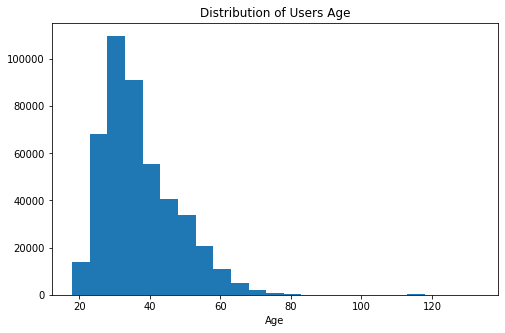

In [6]:
binsize = 5
bins = np.arange(18, df_clean['user_age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'user_age', bins = bins)
plt.xlabel('Age')
plt.title('Distribution of Users Age')
plt.show()

## Distribution of Rides by User Type
89.2% (404424) of the rides were made by the subscribers, while 10.8% (48735) were made by customers. This shows that most user prefer to register and pay for the monthly subscription fee. 

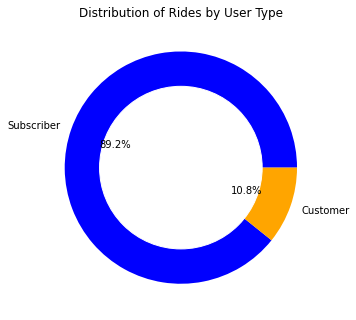

In [ ]:
values = df_clean['user_type'].value_counts().tolist()
labels =  df_clean['user_type'].value_counts().index.tolist()
colors = ['#0000FF', '#FFA500']

# explosion
explode = (0.01,0.01)

# Create a circle at the center of the plot
plt.figure(figsize=[5, 5])
my_circle = plt.Circle((0, 0), 0.7, color='white')
  
# Give color names
plt.pie(values, labels=labels, autopct='%1.1f%%',
        colors=colors)
  
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.tight_layout()
plt.title('Distribution of Rides by User Type')
# Show the graph
plt.show()

## Average Trip Duration By Users
Despite the fact that there are more subscribers than customers, customer spent more time in riding bike than subscribers. Customers has an average 31.5 minutes per trip, while subscribers has an average of 11.8 minutes per trip.



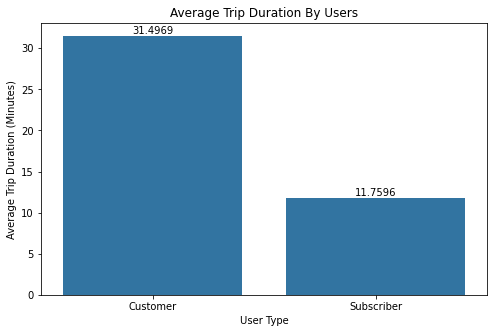

In [8]:
user_time = df_clean.groupby('user_type').duration_minutes.mean()
plt.figure(figsize=[8, 5])
default_color = sb.color_palette()[0]
ax = sb.barplot(x=user_time.index, y= user_time, color = default_color)
ax.bar_label(ax.containers[0])
plt.ylabel('Average Trip Duration (Minutes)')
plt.xlabel('User Type')
plt.title('Average Trip Duration By Users')
plt.show()

## Distribution of Rides by Days of the Week
There are more bike ride on weekdays (from Monday to Friday) and low number of bike rides on Saturday and Sunday. This shows that most users make use of bike ride for moving to their place of work.



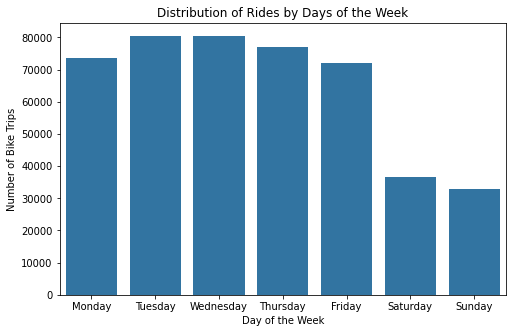

In [ ]:
plt.figure(figsize = [8,5])
sb.countplot(data=df_clean, x= 'day', color = default_color)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Bike Trips')
plt.title('Distribution of Rides by Days of the Week');

## Average Trip Duration By Days of the Week
Even though there are more trips during the weekdays, the average trip duration on weekdays was low, while the average trip duration was high during weekend (Saturday and Sunday).

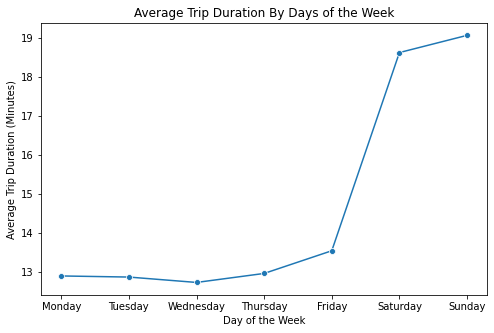

In [9]:
days_mean = df_clean.groupby('day')['duration_minutes'].mean()
plt.figure(figsize = [8,5])
sb.lineplot(x= days_mean.index, y = days_mean, color = default_color, marker = 'o')
plt.xlabel('Day of the Week')
plt.ylabel('Average Trip Duration (Minutes)')
plt.title('Average Trip Duration By Days of the Week');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_explanatory.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_explanatory.ipynb to slides
[NbConvertApp] Writing 367113 bytes to Part_II_explanatory.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_explanatory.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: n